In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [26]:
df = pd.read_csv(r"C:\Users\D.SREEVATHSAV\Downloads\Loan Prediction Dataset - Loan Prediction Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [29]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [31]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [32]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

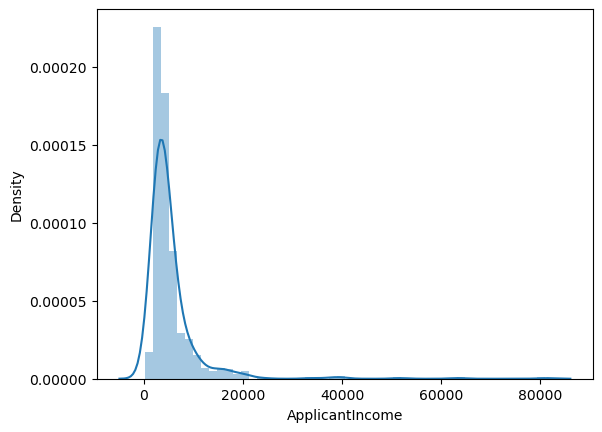

In [41]:
# numerical attributes visualization
sns.distplot(df["ApplicantIncome"])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

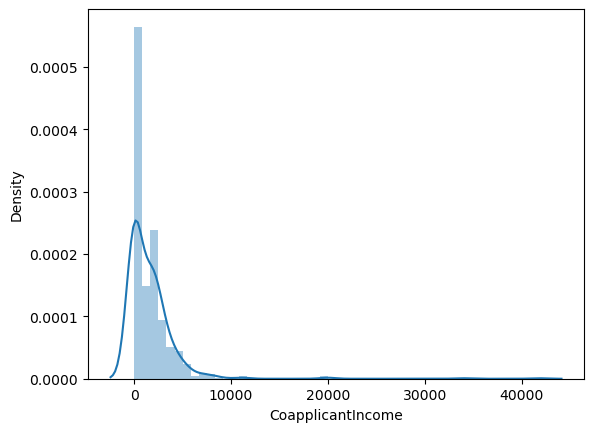

In [42]:
sns.distplot(df["CoapplicantIncome"])

<Axes: xlabel='LoanAmount', ylabel='Density'>

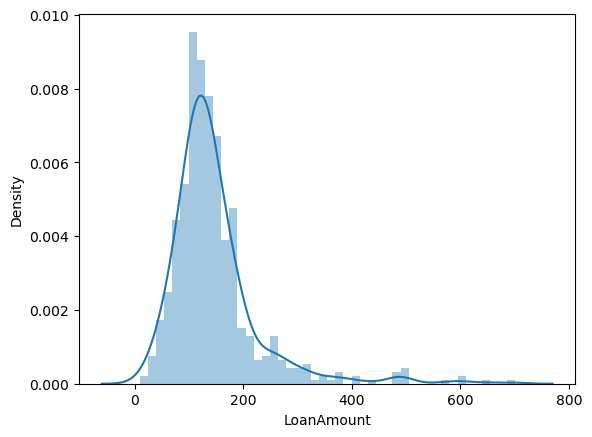

In [43]:
sns.distplot(df["LoanAmount"])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

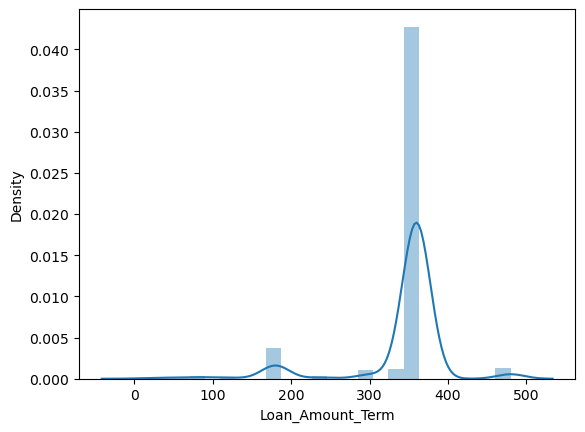

In [44]:
sns.distplot(df['Loan_Amount_Term'])

<Axes: xlabel='Credit_History', ylabel='Density'>

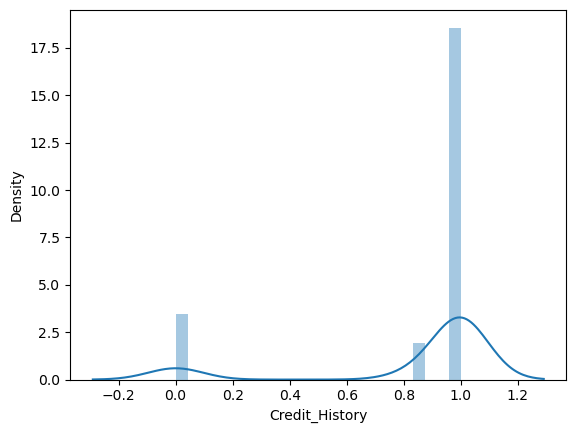

In [45]:
sns.distplot(df['Credit_History'])

In [46]:
# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681


<Axes: >

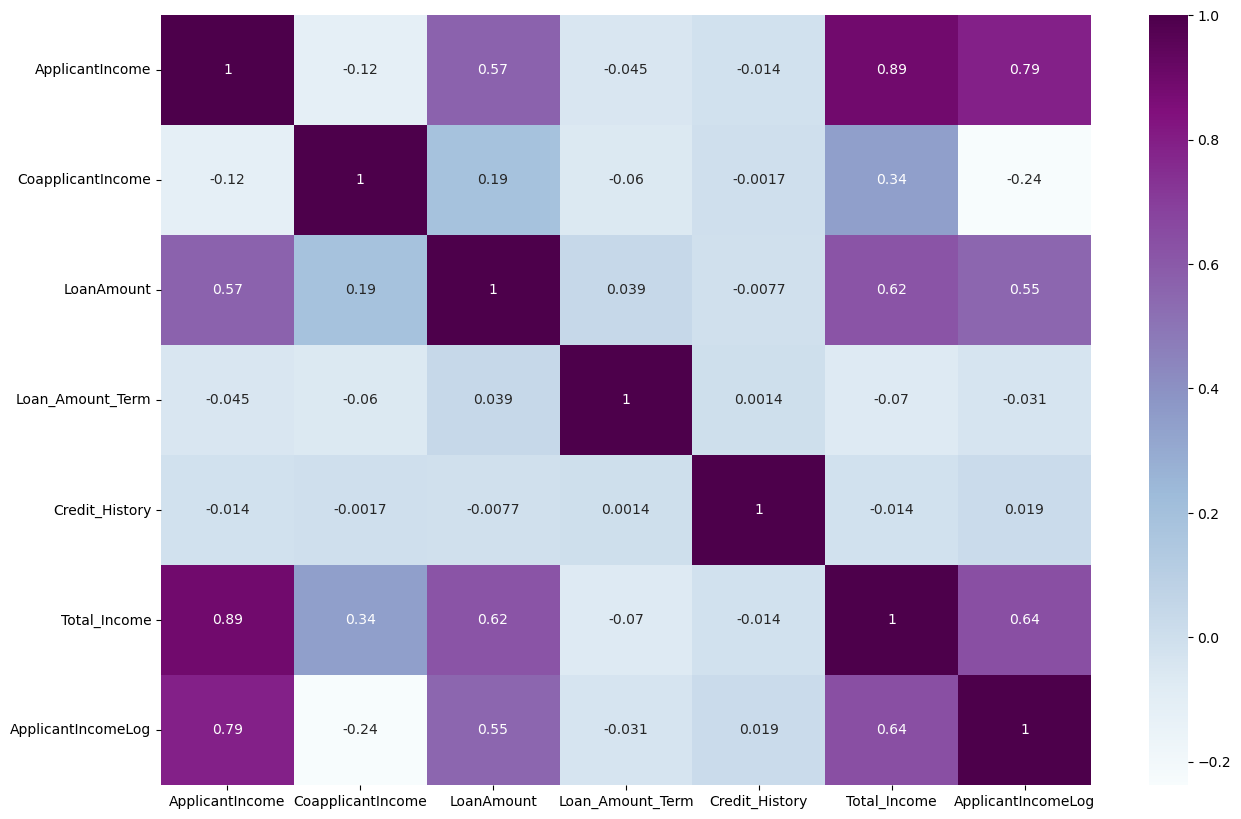

In [47]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [56]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib
df = pd.read_csv(r"C:\Users\D.SREEVATHSAV\Downloads\Loan Prediction Dataset - Loan Prediction Dataset.csv")
df.head()

# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
df['Total_Income_Log'] = np.log(df['Total_Income']+1)

# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)

from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
    
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision of the DT classifier:", precision)
# Calculate F1 score
f1score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score of the DT classifier:", f1score)
# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall of the DT classifier:", recall)

Accuracy: 70.77922077922078
Precision of the DT classifier: 0.7004619957493292
F1 Score of the DT classifier: 0.7026069066533982
Recall of the DT classifier: 0.7077922077922078


In [7]:
import pandas as pd
import numpy as np
import matplotlib
df = pd.read_csv(r"C:\Users\D.SREEVATHSAV\Downloads\Loan Prediction Dataset - Loan Prediction Dataset.csv")
df.head()

# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
df['Total_Income_Log'] = np.log(df['Total_Income']+1)

# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)

from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
    
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
XGB = XGBClassifier()
# Fit the XGB classifier to the training data
XGB.fit(x_train, y_train)
# Predict the labels of the test data
y_pred = XGB.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision of the DT classifier:", precision)
# Calculate F1 score
f1score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score of the DT classifier:", f1score)
# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall of the DT classifier:", recall)

Accuracy: 74.02597402597402
Precision of the DT classifier: 0.7325288141985057
F1 Score of the DT classifier: 0.7272936403371186
Recall of the DT classifier: 0.7402597402597403


In [5]:
import pandas as pd
import numpy as np
import matplotlib
df = pd.read_csv(r"C:\Users\D.SREEVATHSAV\Downloads\Loan Prediction Dataset - Loan Prediction Dataset.csv")
df.head()

# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

# total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
df['Total_Income_Log'] = np.log(df['Total_Income']+1)

# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)

from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
    
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
# Create a Naive's Bayes classifier (for classification tasks)
clf = GaussianNB()
# Train the classifier on the training data
clf.fit(x_train, y_train)
# Make predictions on the test data
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision of the DT classifier:", precision)
# Calculate F1 score
f1score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score of the DT classifier:", f1score)
# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall of the DT classifier:", recall)

Accuracy: 77.27272727272727
Precision of the DT classifier: 0.7968428470754052
F1 Score of the DT classifier: 0.7454032894307063
Recall of the DT classifier: 0.7727272727272727
